In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [29]:
max_len = 30

In [30]:
def sin(x, T=100):
    return np.sin(2.0 * np.pi * x / T) + np.sin(1.0 * np.pi * x / 3.0 / T) 

def toy_problem(T=100, ampl=0.05, n=350):
    x = np.arange(0, 2 * n + 1)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
    return sin(x, T) + noise

f = toy_problem()

In [31]:
def make_dataset(raw_data, max_len=max_len):
    data_list, target_list = [], []
    
    for i in range(len(raw_data) - max_len):
        data_list.append(raw_data[i:i+max_len])
        target_list.append(raw_data[i+max_len])
        
    data = np.array(data_list).reshape(len(data_list), max_len, 1)
    target = np.array(target_list).reshape(len(data_list), 1)
    
    return data, target

In [32]:
g, h = make_dataset(f)

In [33]:
print(g.shape)
print(h.shape)

(671, 30, 1)
(671, 1)


In [34]:
len_seq = g.shape[1]
len_out = 1
n_hidden = 300

model = Sequential()
model.add(LSTM(n_hidden, batch_input_shape=(None, len_seq, len_out), return_sequences=False))
model.add(Dense(len_out))
model.add(Activation("linear"))
optimizer = Adam(lr=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer)

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 300)               362400    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 301       
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 362,701
Trainable params: 362,701
Non-trainable params: 0
_________________________________________________________________


In [36]:
early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=20)
model.fit(g, h, batch_size=30, epochs=100, validation_split=0.1, callbacks=[early_stopping])

Train on 603 samples, validate on 68 samples
Epoch 1/100
603/603 [==============================] - 2s 4ms/step - loss: 0.2149 - val_loss: 0.0384
Epoch 2/100
603/603 [==============================] - 2s 3ms/step - loss: 0.0132 - val_loss: 0.0033
Epoch 3/100
603/603 [==============================] - 2s 3ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 4/100
603/603 [==============================] - 2s 3ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 5/100
603/603 [==============================] - 2s 4ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 6/100
603/603 [==============================] - 2s 3ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 7/100
603/603 [==============================] - 2s 3ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 8/100
603/603 [==============================] - 2s 3ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 9/100
603/603 [==============================] - 1s 2ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 10/100
603/603 [========================

In [37]:
pred = model.predict(g)

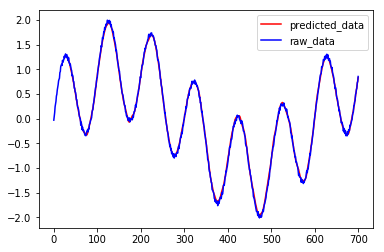

In [38]:
plt.figure()
plt.plot(range(max_len, len(pred)+max_len), pred, color='r', label='predicted_data')
plt.plot(range(0, len(f)), f, color='b', label='raw_data')
plt.legend()
plt.show()

In [41]:
pred_list = []
x = g[-1,:,:]

for _ in range(200):
    pred_ = model.predict(x.reshape([1,max_len,1])).reshape([1,1])
    pred_list.append(pred_)
    x = np.vstack([x[1:], pred_])

pred_feature = np.array(pred_list).reshape(-1)

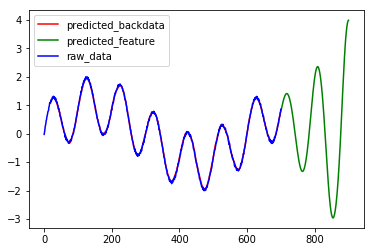

In [42]:
plt.figure()
plt.plot(range(max_len, len(pred)+max_len), pred, color='r', label='predicted_backdata')
plt.plot(range( len(f),  len(f)+len(pred_feature)), pred_feature, color='g', label='predicted_feature')
plt.plot(range(0, len(f)), f, color='b', label='raw_data')
plt.legend()
plt.show()